# MSC Computational Nanoscience Workshop 


## Goals

In this workshop we are going to write elementary molecular simulations to explore the statistical mechanics of many-particle systems.

We are going to use `Python` and exploit all the advantages of dedicated scientific computing libraries. Specifically:
- `numpy` , https://numpy.org/
- `scipy` , https://scipy.org/
- `numba`, https://numba.pydata.org/
- `matplotlib`, https://matplotlib.org/

The advanced goal will be to construct a small web-application. For this purpose - time permitting - we will employ `Bokeh` , https://bokeh.org/  that we will eventually deploy (for example on `Render` https://render.com or `Heroku` https://heroku.com ).

An example application can be found here https://kinetic-gas.onrender.com/



## Basics

Before starting coding, let us revisit some background.

### Numpy

Numpy is *the* key numerical library in Python. It is centered on array manipulation, which it does much more efficiently than pure Python.

Let's show this with an example. We use the `time` library to benchmark our code.

In [2]:
import time

In [3]:
start = time.time()

# pure python sum over the first 1 000 000 integers

s = 0
for i in range(1_000_000):
    s+=i

print(s)
end = time.time()
pure_time = end-start
print("pure Python, total time in seconds", pure_time)

499999500000
pure Python, total time in seconds 0.11485695838928223


We import `numpy` like this

In [4]:
import numpy as np

and generate an `array` of integers and sum over it like this

In [5]:
start = time.time()
integers = np.arange(1000000).sum()
end = time.time()
numpy_time = end-start
print("Python+numpy, total time in seconds", numpy_time)

Python+numpy, total time in seconds 0.004950046539306641


The corresponding speedup is rather significant:

In [6]:
pure_time/numpy_time

23.203207783450534

&rarr; **USE NUMPY!**

#### Key concepts

##### Generating arrays

In [7]:
minimum = -20.0
maximum = 30.0

#known step
step = 0.01
array_with_known_step = np.arange(minimum, maximum,step)
#known number of points
n = 10
array_with_known_n = np.linspace(minimum, maximum,n)

In [8]:
array_with_known_step

array([-20.  , -19.99, -19.98, ...,  29.97,  29.98,  29.99])

In [9]:
array_with_known_n

array([-20.        , -14.44444444,  -8.88888889,  -3.33333333,
         2.22222222,   7.77777778,  13.33333333,  18.88888889,
        24.44444444,  30.        ])

##### Sizing and resizing

In [10]:
array_with_known_n.size

10

In [11]:
array_with_known_step.shape

(5000,)

In [12]:
reshaped = array_with_known_n.reshape((int(n/2),2))
print(reshaped)

[[-20.         -14.44444444]
 [ -8.88888889  -3.33333333]
 [  2.22222222   7.77777778]
 [ 13.33333333  18.88888889]
 [ 24.44444444  30.        ]]


In [13]:
reshaped.shape

(5, 2)

##### Slicing

In [14]:
# selecting the first column
reshaped[:,0]

array([-20.        ,  -8.88888889,   2.22222222,  13.33333333,
        24.44444444])

In [15]:
# selectign  the last row 
reshaped[-1,:]

array([24.44444444, 30.        ])

In [16]:
# selecting even rows
reshaped[::2,:]

array([[-20.        , -14.44444444],
       [  2.22222222,   7.77777778],
       [ 24.44444444,  30.        ]])

In [17]:
# reversing the order of the columns
reshaped[:,::-1]

array([[-14.44444444, -20.        ],
       [ -3.33333333,  -8.88888889],
       [  7.77777778,   2.22222222],
       [ 18.88888889,  13.33333333],
       [ 30.        ,  24.44444444]])

##### Random numbers

To generate random numbers, you need a `generator`. This is an object capable of producing random numbers from a variety of different distributions.

In [18]:
rng = np.random.default_rng()

In [19]:
uniform_array = rng.uniform(-1,1,10000)
normal_array = rng.normal(1,2, 10000)
exponential_array = rng.exponential(2.0,10000)

samples = [uniform_array, normal_array, exponential_array]


Let's use `matplotlib` to plot the distributions.

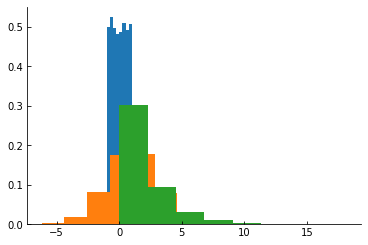

In [20]:
import matplotlib.pyplot as plt

for sample in samples:
    plt.hist(sample, bins = 8, density=True)

In [56]:
# help(plt.hist)

**Exercise 1**

Improve the rendition of the plot above using an array for the `bins` parameter.

**Exercise 2**

Explore the methods associated with the sample arrays to calculate their statistical properties, e.g. mean, standard deviation, variance etc.

In [22]:
uniform_array.mean()

-0.0022981026897233555

In [23]:
for nsamples in [10,100,1000,10000]:
    print(rng.uniform(-1,1,nsamples).mean(), rng.uniform(-1,1,nsamples).std())

0.12948994906411568 0.5037522196757535
0.04003375722098155 0.573541846752184
0.007007606788573698 0.5791452755517107
-0.0003331310972729359 0.5775239836446207


In [24]:
a = [1,2,3,4,5]


In [25]:
import scipy.stats as st

In [26]:
st.skew(a)

0.0

**Exercise 3**

Select only positive entries from the array `uniform_array`.

##### Linear algebra

In [38]:
#  random 2d vectors

N = 4
d  = 2
r = rng.uniform(0,1,(N,d))
r

array([[0.71776244, 0.02650974],
       [0.0042967 , 0.0778394 ],
       [0.70766201, 0.57233913],
       [0.05660578, 0.65365804]])

In [39]:
# norm of a vector
norms = np.linalg.norm(r, axis=1)
norms

array([0.71825182, 0.0779579 , 0.91014153, 0.65610445])

(-0.031376583251336264,
 0.7534357245465185,
 -0.0048476797844534125,
 0.685015454009584)

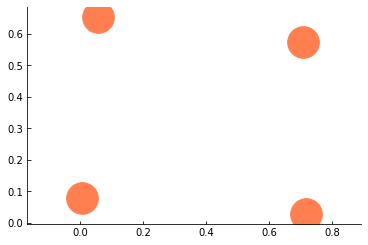

In [55]:
#plotting  the vectors
plt.scatter(r[:,0],r[:,1], s=1000,c='coral')
# plt.quiver(np.zeros(N),np.zeros(N), r[:,0],r[:,1], scale=1, scale_units='xy',angles='xy')
plt.axis('equal')

In [46]:
# scalar product

r2 = np.dot(r[0], r[0])
print(r2)
print (norms[0]**2)

0.5158856832277587
0.5158856832277587


**Exercise 4**

Change the plot above to color the arrows according to their length.

**Exercise 5**

Consider the two vectors

$$\vec{u} = 3\hat{e}_x+6\hat{e}_y$$
$$\vec{v} = -2\hat{e}_x+1\hat{e}_y$$

Show numerically that they are orthogonal.

In [47]:
u = np.array([3,6])
v = np.array([-2,1])

np.dot(u,v)

0

In [48]:
# matrix product
A = np.array([
    [1,1],
    [0,-1]
])


np.matmul(A,A)

array([[1, 0],
       [0, 1]])

**Q (curiosity):** What kind of matrix is `A`?

In [49]:
x = np.array([1,2])
np.matmul(A,x)

array([ 3, -2])

In [50]:
A@x

array([ 3, -2])

In [51]:
np.dot(A,x)

array([ 3, -2])

In [52]:
A*x

array([[ 1,  2],
       [ 0, -2]])

In [61]:
x = np.random.uniform(0,1, (3,2))


In [67]:
x[0]+=np.array([0.5,0
])
x

array([[1.90880289, 0.02748921],
       [0.97167064, 0.5427043 ],
       [0.91554731, 0.16315671]])

array([[0.90880289, 0.02748921],
       [0.97167064, 0.5427043 ],
       [0.91554731, 0.16315671]])

**Exercise 6**

Explain the difference between `A*x` and `A@x`. Use the documentation.